## Download the dataset - from Kaggle

Skip this step if you have the data in Drive already!

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nishamcnealis","key":"7eb43797632aee880302672c16d5cb1d"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                  title                                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  --------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                   Vehicle Sales Data                       19MB  2024-02-21 20:16:17           9790        176  1.0              
arnavvvvv/spotify-music                              Top Spotify Songs                        47KB  2024-03-06 05:20:29           1618         35  1.0              
tarunrm09/climate-change-indicators                  Climate change Indicators                34KB  2024-02-22 08:53:54           5094        113  1.0              
arnavvvvv/netflix-movies-and-tv-shows                Netflix Movies and TV Shows               1MB  2024-03-04 15:49:29           1885         45  1.0              
zain280/da

In [ ]:
! kaggle competitions download -c bgu-recommendation-systems-click-through-rate

  5% 584M/11.7G [00:05<01:51, 107MB/s]
User cancelled operation


In [ ]:
import zipfile
import os

zip_file_path = 'bgu-recommendation-systems-click-through-rate.zip'
extracted_folder_path = 'bgu-recommendation-systems-click-through-rate'

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print(f"Successfully extracted contents to {extracted_folder_path}")

## Download the dataset - from Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
from tqdm import tqdm

parent_dir = '/content/drive/MyDrive/cs247project/data/train_data'

# Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()

# Iterate through each folder (train1 through train7)
for folder_name in os.listdir(parent_dir):
    folder_path = os.path.join(parent_dir, folder_name)

    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Iterate through each CSV file in the folder
        for file_name in tqdm(os.listdir(folder_path), desc=f"Processing {folder_name}"):
            if file_name.endswith('.csv'):
                file_path = os.path.join(folder_path, file_name)

                # Read the CSV file into a DataFrame
                this_df = pd.read_csv(file_path)

                # Concatenate the current DataFrame with the combined_data DataFrame
                df = pd.concat([df, this_df], ignore_index=True)

# Print the combined DataFrame
print(df)


Processing train7: 100%|██████████| 8/8 [01:51<00:00, 13.92s/it]


          page_view_start_time  \
0                1586392478339   
1                1587264330576   
2                1586971453279   
3                1586446676383   
4                1587072791703   
...                        ...   
30254853         1586781192413   
30254854         1587308225350   
30254855         1587237967330   
30254856         1587039469226   
30254857         1586694816553   

                                               user_id_hash  \
0         939e2ccfb21e0ec9b0787c394dea1ae935369da0bcc597...   
1         decc9bcd3a7f2807721a35368b362782ec5bf4b4fb7ecf...   
2         30b6851a72026b837c7b33190ec7684763f36a8cd7722c...   
3         0b03f7d7bfc9d81e55ebeb994d572ca65cca353e7aaf85...   
4         b46cb1c9681e58c0a09b88b82c36913cbf3f710674eb39...   
...                                                     ...   
30254853  f290ba4332594f26669e4a6f030df830ff4d62e55a3f94...   
30254854  116a09bbc9cd768a93099fcc410b746d89704f62e4cc97...   
30254855  36aaa95f7cd9c9

In [ ]:
# import pandas as pd
# df = pd.DataFrame()
# df = pd.read_csv("/content/drive/MyDrive/cs247project/data/train_data/train1/part-00000.csv")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
user_counts = df['user_id_hash'].value_counts()

threshold = 7

users_to_keep = user_counts[user_counts > threshold].index
trimmed_df = df[df['user_id_hash'].isin(users_to_keep)]
print(f"Threshold: {threshold}, Num Users: {len(users_to_keep)}, DF length: {len(trimmed_df)}")
trimmed_df.to_csv(f'/content/drive/MyDrive/cs247project/data/trimmed-data-threshold-{threshold}-test.csv', index=False)

Threshold: 7, Num Users: 462041, DF length: 5714394


In [ ]:
print(trimmed_df.shape)
print(len(user_counts[user_counts > 7]))

(5714394, 23)
462041


In [ ]:
print(trimmed_df.shape)

(5714394, 23)


In [ ]:
df = trimmed_df

## Get basic info about features

In [ ]:
df.head(5)

,page_view_start_time,user_id_hash,target_id_hash,syndicator_id_hash,campaign_id_hash,empiric_calibrated_recs,empiric_clicks,target_item_taxonomy,placement_id_hash,user_recs,...,source_id_hash,source_item_type,browser_platform,os_family,country_code,region,day_of_week,time_of_day,gmt_offset,is_click
4,1587072791703,11463395,79556,527,14201,4976.14800,1974.0,1,616,825.0,...,5e7a6ed11cdc1472ea91031bc66078c8ecd5283e2863d2...,text,DESK,6,US,CO,4,15,-600,0.0
7,1586447112061,5136704,17210,1343,10846,66.90616,351.0,29,258,338.0,...,c83159630182a5b7bc3c3fc985156c03b2a43129d63376...,homepage,DESK,6,US,VA,4,11,-400,1.0
9,1586261443719,11149953,85705,2582,24208,2317.31030,10467.0,8,1324,546.0,...,389b69708cf58731e78e2e023a8c608d886fe5aebc0e23...,category,DESK,6,US,IL,2,7,-500,1.0
10,1586610745867,6546224,37569,1134,11548,301.32420,1282.0,55,360,427.0,...,c83159630182a5b7bc3c3fc985156c03b2a43129d63376...,homepage,DESK,6,US,LA,6,8,-500,1.0
16,1586787571640,4471597,77954,91,14560,0.00000,0.0,51,424,670.0,...,4c7987d659b97d2007c45bb3c9fd903b135a2ef18130f7...,homepage,DESK,6,US,MD,1,10,-400,1.0


In [ ]:
df.dtypes

page_view_start_time         int64
user_id_hash                 int64
target_id_hash               int64
syndicator_id_hash           int64
campaign_id_hash             int64
empiric_calibrated_recs    float64
empiric_clicks             float64
target_item_taxonomy         int64
placement_id_hash            int64
user_recs                  float64
user_clicks                float64
user_target_recs           float64
publisher_id_hash           object
source_id_hash              object
source_item_type            object
browser_platform            object
os_family                    int64
country_code                object
region                      object
day_of_week                  int64
time_of_day                  int64
gmt_offset                   int64
is_click                   float64
dtype: object

In [ ]:
df.shape

(5714394, 23)

In [ ]:
df.count()

page_view_start_time       462734
user_id_hash               462734
target_id_hash             462734
syndicator_id_hash         462734
campaign_id_hash           462734
empiric_calibrated_recs    462734
empiric_clicks             462734
target_item_taxonomy       462734
placement_id_hash          462734
user_recs                  462734
user_clicks                462734
user_target_recs           462734
publisher_id_hash          462734
source_id_hash             462734
source_item_type           462734
browser_platform           462734
os_family                  462734
country_code               462727
region                     462724
day_of_week                462734
time_of_day                462734
gmt_offset                 462734
is_click                   462734
dtype: int64

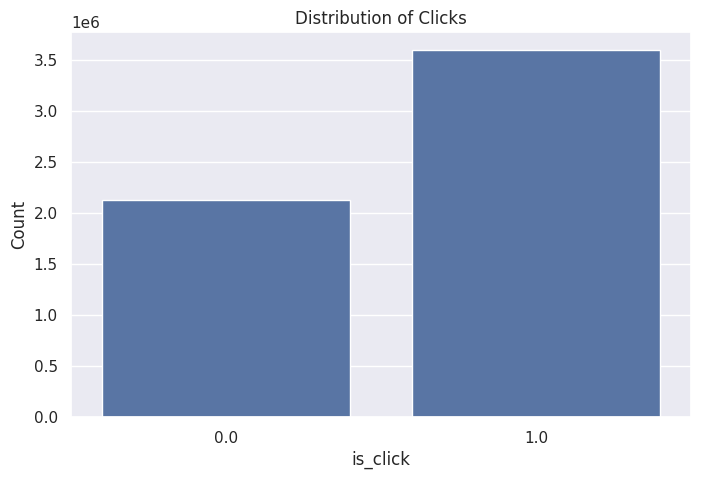

In [ ]:
# Visualize is_click, make sure the classes are balanced
plt.figure(figsize=(8, 5))
sns.countplot(x='is_click', data=df)
plt.title('Distribution of Clicks')
plt.xlabel('is_click')
plt.ylabel('Count')
plt.show()

In [ ]:
# Balance dataset
click_count = (df['is_click'] == 1).sum()
non_click_count = (df['is_click'] == 0).sum()
print(f"Click count: {click_count}")
print(f"Non-click count: {non_click_count}")

Click count: 3591078
Non-click count: 2123262


In [ ]:
click_0 = df[df['is_click'] == 0]
click_1 = df[df['is_click'] == 1]
undersampled_df = pd.concat([click_0, click_1.sample(len(click_0))])
print(len(undersampled_df))

4246524


In [ ]:
undersampled_df.to_csv(f'/content/drive/MyDrive/cs247project/data/undersampled_df_threshold_7.csv', index=False)

In [ ]:
df = undersampled_df

## Remove null values

In [ ]:
print(df.isnull().sum())

page_view_start_time       0
user_id_hash               0
target_id_hash             0
syndicator_id_hash         0
campaign_id_hash           0
empiric_calibrated_recs    0
empiric_clicks             0
target_item_taxonomy       0
placement_id_hash          0
user_recs                  0
user_clicks                0
user_target_recs           0
publisher_id_hash          0
source_id_hash             0
source_item_type           0
browser_platform           0
os_family                  0
country_code               0
region                     0
day_of_week                0
time_of_day                0
gmt_offset                 0
is_click                   0
dtype: int64


In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

page_view_start_time       4246524
user_id_hash               4246524
target_id_hash             4246524
syndicator_id_hash         4246524
campaign_id_hash           4246524
empiric_calibrated_recs    4246524
empiric_clicks             4246524
target_item_taxonomy       4246524
placement_id_hash          4246524
user_recs                  4246524
user_clicks                4246524
user_target_recs           4246524
publisher_id_hash          4246524
source_id_hash             4246524
source_item_type           4246524
browser_platform           4246524
os_family                  4246524
country_code               4246524
region                     4246524
day_of_week                4246524
time_of_day                4246524
gmt_offset                 4246524
is_click                   4246524
dtype: int64

In [ ]:
print(df.isnull().sum())

page_view_start_time       0
user_id_hash               0
target_id_hash             0
syndicator_id_hash         0
campaign_id_hash           0
empiric_calibrated_recs    0
empiric_clicks             0
target_item_taxonomy       0
placement_id_hash          0
user_recs                  0
user_clicks                0
user_target_recs           0
publisher_id_hash          0
source_id_hash             0
source_item_type           0
browser_platform           0
os_family                  0
country_code               0
region                     0
day_of_week                0
time_of_day                0
gmt_offset                 0
is_click                   0
dtype: int64


In [ ]:
print(df['user_id_hash'].nunique())
print(df['target_id_hash'].nunique())


462030
55876


## Check for outliers

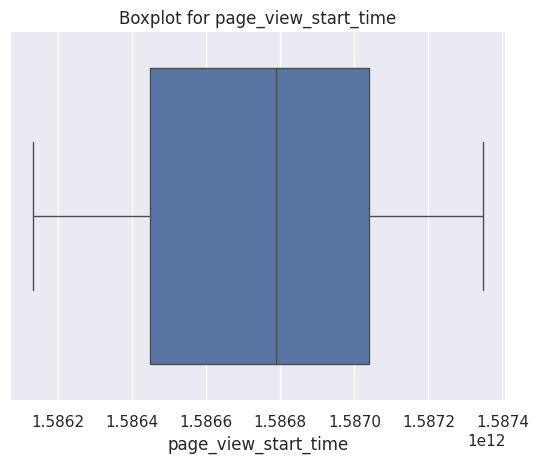

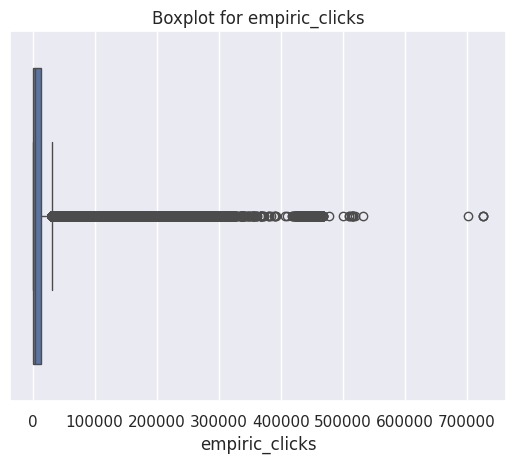

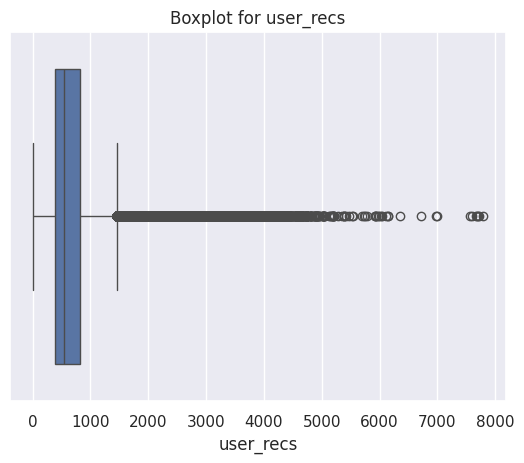

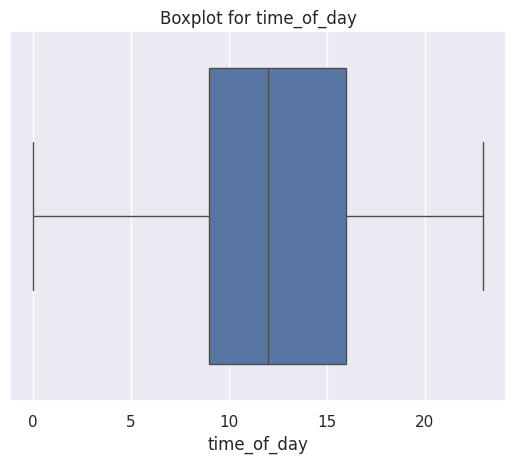

In [ ]:
cols = ['page_view_start_time', 'empiric_clicks', 'user_recs', 'time_of_day'] # can add/remove from this as needed

for col in cols:
      # Create a boxplot for the current column
      sns.boxplot(x=df[col])

      # Set plot title with the column name
      plt.title(f'Boxplot for {col}')

      # Show the plot
      plt.show()

In [ ]:
unique_user_ids = df['user_id_hash'].nunique()
print(unique_user_ids)
unique_target_ids = df['target_id_hash'].nunique()
print(unique_target_ids)

unique_publisher_ids = df['publisher_id_hash'].nunique()
print(unique_publisher_ids)
unique_source_ids = df['source_id_hash'].nunique()
print(unique_source_ids)

462030
55876
3
111868


## Identify most important features:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_numeric_features_only = df.loc[:, numeric_features]

X = df_numeric_features_only.drop('is_click', axis=1)
y = df_numeric_features_only['is_click']

# Create and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Combine with feature names
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort and display
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_features)



In [ ]:
# Plot the two most important features
plt.figure(figsize=(10, 6))

# Scatter plot with custom colors based on is_click
colors = df['is_click'].map({0: 'red', 1: 'green'})
plt.scatter(df['empiric_calibrated_recs'], df['empiric_clicks'], c=colors)

# Adding labels and title
plt.title('Scatter Plot: empiric_calibrated_recs vs empiric_clicks')
plt.xlabel('empiric_calibrated_recs')
plt.ylabel('empiric_clicks')

plt.show()

In [ ]:
# Plot the some of the less important features
plt.figure(figsize=(10, 6))

# Scatter plot with custom colors based on is_click
colors = df['is_click'].map({0: 'red', 1: 'green'})
plt.scatter(df['user_target_recs'], df['user_recs'], c=colors)

# Adding labels and title
plt.title('Scatter Plot: user_target_recs vs user_recs')
plt.xlabel('user_target_recs')
plt.ylabel('user_recs')

plt.show()


In [ ]:
# https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python

## Baseline Classifiers

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# All our baselines only use the numerical features in the dataset
X = df_numeric_features_only.drop('is_click', axis=1)  # Features
y = df_numeric_features_only['is_click']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


### Perceptron

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define one-layer neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


## Model-Based Collaborative Filtering

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader

class CTRDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

        # Encode categorical columns
        self.item_features = dataframe[["syndicator_id_hash", "campaign_id_hash", "empiric_calibrated_recs", "empiric_clicks",
                                        "target_item_taxonomy", "placement_id_hash", "page_view_start_time"]]
        self.user_features = dataframe[["user_target_recs", "user_recs", "user_clicks"]]
        self.context_features = dataframe[["source_item_type", "browser_platform", "region", "time_of_day", "gmt_offset", "day_of_week", "os_family"]]
        self.labels = dataframe["is_click"]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        user_id = torch.tensor([self.data.iloc[idx]['user_id_hash']], dtype=torch.int)
        item_id = torch.tensor([self.data.iloc[idx]['target_id_hash']], dtype=torch.int)
        user_features = torch.tensor(self.user_features.iloc[idx].values, dtype=torch.float32)
        item_features = torch.tensor(self.item_features.iloc[idx].values, dtype=torch.float32)
        context_features = torch.tensor(self.context_features.iloc[idx].values, dtype=torch.float32)
        label = torch.tensor(self.labels.iloc[idx], dtype=torch.float32)
        return user_id, item_id, user_features, item_features, context_features, label

In [5]:
import torch
import torch.nn as nn

class NeuralCollaborativeFiltering(nn.Module):
    def __init__(self, num_users, num_items, num_user_features=7, num_item_features=3, num_context_features=7, embedding_size=50, hidden_size=100):
        super(NeuralCollaborativeFiltering, self).__init__()

        self.embedding_size = embedding_size
        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.item_embedding = nn.Embedding(num_items, embedding_size)

        self.fc = nn.Sequential(
            nn.Linear(2 * embedding_size + num_user_features + num_item_features + num_context_features, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )

    def forward(self, user_id, item_id, user_features, item_features, context_features):
        user_embeds = self.user_embedding(user_id).view(-1, self.embedding_size)
        item_embeds = self.item_embedding(item_id).view(-1, self.embedding_size)

        # Concatenate user and item embeddings
        x = torch.cat([user_embeds, item_embeds, user_features, item_features, context_features], dim=1)

        # Pass through fully connected layers
        output = self.fc(x)

        return output.squeeze()

In [6]:
df = pd.read_csv(f'/content/drive/MyDrive/cs247project/data/undersampled_df_threshold_7.csv')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

clean_df = df
label_encoder = LabelEncoder()
clean_df['target_id_hash'] = label_encoder.fit_transform(clean_df['target_id_hash'])
clean_df['syndicator_id_hash'] = label_encoder.fit_transform(clean_df['syndicator_id_hash'])
clean_df['campaign_id_hash'] = label_encoder.fit_transform(clean_df['campaign_id_hash'])
clean_df['target_item_taxonomy'] = label_encoder.fit_transform(clean_df['target_item_taxonomy'])
clean_df['placement_id_hash'] = label_encoder.fit_transform(clean_df['placement_id_hash'])
clean_df['user_id_hash'] = label_encoder.fit_transform(clean_df['user_id_hash'])
clean_df['publisher_id_hash'] = label_encoder.fit_transform(clean_df['publisher_id_hash'])
clean_df['source_id_hash'] = label_encoder.fit_transform(clean_df['source_id_hash'])
clean_df['source_item_type'] = label_encoder.fit_transform(clean_df['source_item_type'])
clean_df['browser_platform'] = label_encoder.fit_transform(clean_df['browser_platform'])
clean_df['region'] = label_encoder.fit_transform(clean_df['region'])

train_df, test_df = train_test_split(clean_df, test_size=0.2, random_state=0)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=0)

train_dataset = CTRDataset(train_df)
val_dataset = CTRDataset(val_df)
test_dataset = CTRDataset(test_df)

batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_users = clean_df['user_id_hash'].nunique()
num_targets = clean_df['target_id_hash'].nunique()

In [7]:
print(clean_df.shape)
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(4246524, 23)
(2717775, 23)
(679444, 23)
(849305, 23)


In [8]:
from tqdm import tqdm

model = NeuralCollaborativeFiltering(num_users, num_targets)
print(next(model.parameters()).device)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(next(model.parameters()).device)

last_epoch = 0

#state_dict = torch.load(f'/content/drive/MyDrive/cs247project/ncf_model_undersampled_checkpoint_epoch_{last_epoch}.pth')
#model.load_state_dict(state_dict)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 25

for epoch in range(last_epoch, num_epochs):
    model.train()
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('\tTraining')
    for user_id, item_id, user_features, item_features, context_features, target in tqdm(train_dataloader):
        optimizer.zero_grad()
        user_id = user_id.to(device)
        item_id = item_id.to(device)
        user_features = user_features.to(device)
        item_features = item_features.to(device)
        context_features = context_features.to(device)
        target = target.to(device)
        output = model(user_id, item_id, user_features, item_features, context_features)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    print('\tValidation')
    val_loss = 0.0
    with torch.no_grad():
        for user_id, item_id, user_features, item_features, context_features, target in tqdm(val_dataloader):
            user_id = user_id.to(device)
            item_id = item_id.to(device)
            user_features = user_features.to(device)
            item_features = item_features.to(device)
            context_features = context_features.to(device)
            target = target.to(device)
            output = model(user_id, item_id, user_features, item_features, context_features)
            val_loss += criterion(output, target)

    print(f'\tTraining Loss: {loss.item()}, Validation Loss: {val_loss.item()}')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/cs247project/ncf_model_undersampled_checkpoint_epoch_{epoch + 1}.pth')

# Step 8: Evaluate the model on the test set
model.eval()
test_loss = 0.0
correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for user_id, item_id, user_features, item_features, context_features, target in tqdm(test_dataloader):
        user_id = user_id.to(device)
        item_id = item_id.to(device)
        user_features = user_features.to(device)
        item_features = item_features.to(device)
        context_features = context_features.to(device)
        target = target.to(device)
        output = model(user_id, item_id, user_features, item_features, context_features)
        test_loss += criterion(output, target)
        predicted_labels = (output >= 0.5).float()
        correct_predictions += (predicted_labels == target).sum().item()
        total_samples += target.size(0)

test_accuracy = correct_predictions / total_samples
print(f'Test Loss: {test_loss.item()}, Test Accuracy: {test_accuracy}')

cpu
cuda:0
Epoch 1/25
	Training


100%|██████████| 42466/42466 [24:41<00:00, 28.67it/s]


	Validation


100%|██████████| 10617/10617 [05:47<00:00, 30.59it/s]


	Training Loss: 40.000003814697266, Validation Loss: 531299.0625
Epoch 2/25
	Training


100%|██████████| 42466/42466 [24:24<00:00, 29.00it/s]


	Validation


100%|██████████| 10617/10617 [05:45<00:00, 30.75it/s]


	Training Loss: 33.333335876464844, Validation Loss: 531299.0625
Epoch 3/25
	Training


100%|██████████| 42466/42466 [24:10<00:00, 29.27it/s]


	Validation


100%|██████████| 10617/10617 [05:42<00:00, 30.97it/s]


	Training Loss: 33.333335876464844, Validation Loss: 531299.0625
Epoch 4/25
	Training


100%|██████████| 42466/42466 [24:23<00:00, 29.02it/s]


	Validation


100%|██████████| 10617/10617 [05:42<00:00, 30.96it/s]


	Training Loss: 20.000001907348633, Validation Loss: 531299.0625
Epoch 5/25
	Training


100%|██████████| 42466/42466 [24:14<00:00, 29.20it/s]


	Validation


100%|██████████| 10617/10617 [05:45<00:00, 30.73it/s]


	Training Loss: 53.333335876464844, Validation Loss: 531299.0625
Epoch 6/25
	Training


100%|██████████| 42466/42466 [24:24<00:00, 28.99it/s]


	Validation


100%|██████████| 10617/10617 [05:42<00:00, 30.99it/s]


	Training Loss: 26.666667938232422, Validation Loss: 531299.0625
Epoch 7/25
	Training


100%|██████████| 42466/42466 [24:14<00:00, 29.20it/s]


	Validation


100%|██████████| 10617/10617 [05:41<00:00, 31.10it/s]


	Training Loss: 33.333335876464844, Validation Loss: 531299.0625
Epoch 8/25
	Training


  1%|          | 265/42466 [00:09<24:59, 28.15it/s]


KeyboardInterrupt: 

In [11]:
from tqdm import tqdm

model = NeuralCollaborativeFiltering(num_users, num_targets)
print(next(model.parameters()).device)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(next(model.parameters()).device)

last_epoch = 7

state_dict = torch.load(f'/content/drive/MyDrive/cs247project/ncf_model_undersampled_checkpoint_epoch_{last_epoch}.pth')
model.load_state_dict(state_dict)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 25

for epoch in range(last_epoch, num_epochs):
    model.train()
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('\tTraining')
    for user_id, item_id, user_features, item_features, context_features, target in tqdm(train_dataloader):
        optimizer.zero_grad()
        user_id = user_id.to(device)
        item_id = item_id.to(device)
        user_features = user_features.to(device)
        item_features = item_features.to(device)
        context_features = context_features.to(device)
        target = target.to(device)
        output = model(user_id, item_id, user_features, item_features, context_features)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    print('\tValidation')
    val_loss = 0.0
    with torch.no_grad():
        for user_id, item_id, user_features, item_features, context_features, target in tqdm(val_dataloader):
            user_id = user_id.to(device)
            item_id = item_id.to(device)
            user_features = user_features.to(device)
            item_features = item_features.to(device)
            context_features = context_features.to(device)
            target = target.to(device)
            output = model(user_id, item_id, user_features, item_features, context_features)
            val_loss += criterion(output, target)

    print(f'\tTraining Loss: {loss.item()}, Validation Loss: {val_loss.item()}')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/cs247project/ncf_model_undersampled_checkpoint_epoch_{epoch + 1}.pth')

# Step 8: Evaluate the model on the test set
model.eval()
test_loss = 0.0
correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for user_id, item_id, user_features, item_features, context_features, target in tqdm(test_dataloader):
        user_id = user_id.to(device)
        item_id = item_id.to(device)
        user_features = user_features.to(device)
        item_features = item_features.to(device)
        context_features = context_features.to(device)
        target = target.to(device)
        output = model(user_id, item_id, user_features, item_features, context_features)
        test_loss += criterion(output, target)
        predicted_labels = (output >= 0.5).float()
        correct_predictions += (predicted_labels == target).sum().item()
        total_samples += target.size(0)

test_accuracy = correct_predictions / total_samples
print(f'Test Loss: {test_loss.item()}, Test Accuracy: {test_accuracy}')

cpu
cuda:0
Epoch 8/25
	Training


100%|██████████| 42466/42466 [24:14<00:00, 29.20it/s]


	Validation


100%|██████████| 10617/10617 [05:42<00:00, 31.01it/s]


	Training Loss: 60.000003814697266, Validation Loss: 531299.0625
Epoch 9/25
	Training


100%|██████████| 42466/42466 [24:11<00:00, 29.26it/s]


	Validation


100%|██████████| 10617/10617 [05:40<00:00, 31.22it/s]


	Training Loss: 33.333335876464844, Validation Loss: 531299.0625
Epoch 10/25
	Training


100%|██████████| 42466/42466 [24:05<00:00, 29.38it/s]


	Validation


100%|██████████| 10617/10617 [05:46<00:00, 30.66it/s]


	Training Loss: 80.00000762939453, Validation Loss: 531299.0625
Epoch 11/25
	Training


100%|██████████| 42466/42466 [25:07<00:00, 28.16it/s]


	Validation


100%|██████████| 10617/10617 [06:03<00:00, 29.19it/s]


	Training Loss: 60.000003814697266, Validation Loss: 531299.0625
Epoch 12/25
	Training


100%|██████████| 42466/42466 [25:44<00:00, 27.49it/s]


	Validation


100%|██████████| 10617/10617 [05:57<00:00, 29.74it/s]


	Training Loss: 40.000003814697266, Validation Loss: 531299.0625
Epoch 13/25
	Training


100%|██████████| 42466/42466 [25:26<00:00, 27.82it/s]


	Validation


100%|██████████| 10617/10617 [05:59<00:00, 29.53it/s]


	Training Loss: 60.000003814697266, Validation Loss: 531299.0625
Epoch 14/25
	Training


100%|██████████| 42466/42466 [25:35<00:00, 27.65it/s]


	Validation


100%|██████████| 10617/10617 [05:53<00:00, 30.00it/s]


	Training Loss: 46.66666793823242, Validation Loss: 531299.0625
Epoch 15/25
	Training


 66%|██████▌   | 28101/42466 [16:53<08:38, 27.72it/s]


KeyboardInterrupt: 

In [ ]:
num_epochs = 10

for epoch in [9]:
    epoch_model = NeuralCollaborativeFiltering(num_users, num_targets)
    state_dict = torch.load(f'/content/drive/MyDrive/cs247project/model_checkpoint_epoch_{epoch + 1}.pth')
    print(state_dict['user_embedding.weight'].shape)
    epoch_model.load_state_dict(state_dict)
    epoch_model.eval()

    test_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for user_id, item_id, user_features, item_features, target in test_dataloader:
            output = epoch_model(user_id, item_id, user_features, item_features)
            test_loss += criterion(output, target)
            predicted_labels = (output >= 0.5).float()
            correct_predictions += (predicted_labels == target).sum().item()
            total_samples += target.size(0)

    epoch_test_accuracy = correct_predictions / total_samples
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Loss: {test_loss.item()}, Test Accuracy: {epoch_test_accuracy}')


torch.Size([726, 50])


RuntimeError: Error(s) in loading state_dict for NeuralCollaborativeFiltering:
	size mismatch for user_embedding.weight: copying a param with shape torch.Size([726, 50]) from checkpoint, the shape in current model is torch.Size([16264937, 50]).
	size mismatch for item_embedding.weight: copying a param with shape torch.Size([1586, 50]) from checkpoint, the shape in current model is torch.Size([95082, 50]).

In [12]:
for epoch in range(14):
    epoch_model = NeuralCollaborativeFiltering(num_users, num_targets)
    state_dict = torch.load(f'/content/drive/MyDrive/cs247project/ncf_model_undersampled_checkpoint_epoch_{epoch + 1}.pth')
    epoch_model.load_state_dict(state_dict)
    print(next(epoch_model.parameters()).device)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    epoch_model = epoch_model.to(device)
    print(next(epoch_model.parameters()).device)

    epoch_model.eval()

    test_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for user_id, item_id, user_features, item_features, context_features, target in tqdm(val_dataloader):
            user_id = user_id.to(device)
            item_id = item_id.to(device)
            user_features = user_features.to(device)
            item_features = item_features.to(device)
            context_features = context_features.to(device)
            target = target.to(device)
            output = epoch_model(user_id, item_id, user_features, context_features, item_features)
            test_loss += criterion(output, target)
            predicted_labels = (output >= 0.5).float()
            correct_predictions += (predicted_labels == target).sum().item()
            total_samples += target.size(0)

    epoch_test_accuracy = correct_predictions / total_samples
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Loss: {test_loss.item()}, Test Accuracy: {epoch_test_accuracy}')


cpu
cuda:0


100%|██████████| 10617/10617 [06:05<00:00, 29.03it/s]


Epoch 1/25, Test Loss: 531299.0625, Test Accuracy: 0.49956729325742816
cpu
cuda:0


100%|██████████| 10617/10617 [06:01<00:00, 29.38it/s]


Epoch 2/25, Test Loss: 531299.0625, Test Accuracy: 0.49956729325742816
cpu
cuda:0


100%|██████████| 10617/10617 [06:02<00:00, 29.29it/s]


Epoch 3/25, Test Loss: 531299.0625, Test Accuracy: 0.49956729325742816
cpu
cuda:0


 26%|██▋       | 2805/10617 [01:35<04:26, 29.28it/s]


KeyboardInterrupt: 